In [5]:
# Import libraries and create sql connection
import pandas as pd
import pyodbc
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import statsmodels.formula.api as smf
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
conn_sql = pyodbc.connect(r'DSN=eComm;Trusted_Connection=yes;MARS_Connection=yes')
cursor_sql = conn_sql.cursor()

In [10]:
# Retrieve daily picks, substitutions, out of stock data
QUERY = '''
SELECT * FROM TABLE
'''

cursor_sql.execute(QUERY)
daily = pd.read_sql(QUERY, conn_sql)

In [11]:
daily.head()

,d_date,Picks,Subs,OOS,TTLLines,Availability,OOS_Per
0,2017-12-31,75,7,2,84,0.893,0.024
1,2018-01-02,197,21,3,221,0.891,0.014
2,2018-01-03,157,15,6,178,0.882,0.034
3,2018-01-04,116,4,7,127,0.913,0.055
4,2018-01-05,125,9,3,137,0.912,0.022


In [12]:
# Convert date to numbers
daily['date_ordinal'] = pd.to_datetime(daily['d_date']).apply(lambda date: date.toordinal())
daily['date_index'] = daily.index

daily.head()

,d_date,Picks,Subs,OOS,TTLLines,Availability,OOS_Per,date_ordinal,date_index
0,2017-12-31,75,7,2,84,0.893,0.024,736694,0
1,2018-01-02,197,21,3,221,0.891,0.014,736696,1
2,2018-01-03,157,15,6,178,0.882,0.034,736697,2
3,2018-01-04,116,4,7,127,0.913,0.055,736698,3
4,2018-01-05,125,9,3,137,0.912,0.022,736699,4


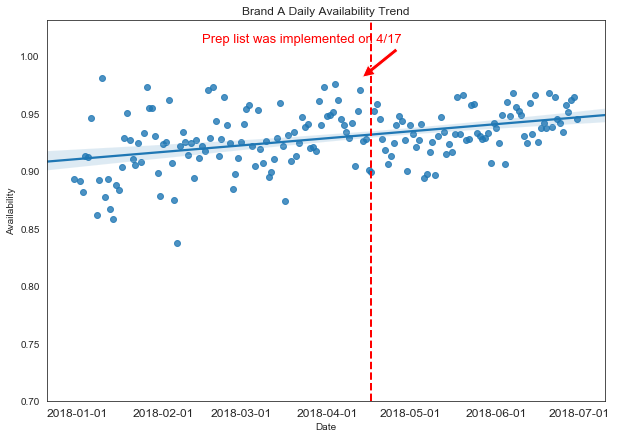

In [13]:
sns.set_style("white")
plt.subplots(figsize=(10,7))

ax = sns.regplot(
    data=daily,
    x='date_ordinal',
    y='Availability',
)

# Tighten up the axes for prettiness
ax.set_xlim(daily['date_ordinal'].min()-10, daily['date_ordinal'].max()+10)
ax.set_ylim(0.7, daily['Availability'].max()+ 0.05)

ax.axvline(pd.to_datetime('2018-04-17'), color='r', linestyle='--', lw=2)

# Annotate with text + arrow
plt.annotate(
    'Prep list was implemented on 4/17', xy=(736797, 0.98), xytext=(736812, 1.02),
    color='red', fontsize=13,
    horizontalalignment='right', verticalalignment='top',
    arrowprops=dict(facecolor='red', shrink=0.05)
            )

ax.set_title('Brand A Daily Availability Trend')
ax.set_xlabel('Date')
new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
ax.set_xticklabels(new_labels,fontsize=12);

In [8]:
lm = smf.ols('Availability~date_index', data=daily).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Availability   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     36.00
Date:                Thu, 27 Dec 2018   Prob (F-statistic):           1.08e-08
Time:                        15:17:07   Log-Likelihood:                 421.46
No. Observations:                 180   AIC:                            -838.9
Df Residuals:                     178   BIC:                            -832.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9104      0.003    262.036      0.000       0.904       0.917
date_index     0.0002   3.36e-05      6.000      0.000       0.000       0.000
==============================================================================
Omnibus:                        2.160   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.340   Jarque-Bera (JB):                2.007
Skew:                          -0.025   Prob(JB):                        0.367
Kurtosis:                       3.515   Cond. No.                         206.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# Retrieve weekly picks, substitutions, out of stock data
QUERY = '''
SELECT * FROM TABLE
'''

cursor_sql.execute(QUERY)
weekly = pd.read_sql(QUERY, conn_sql)

In [18]:
weekly.head()

,week_id,Picks,Subs,OOS,TTLLines,Availability,OOS_Per
0,201744,228,12,7,247,0.923,0.028
1,201745,1971,139,76,2186,0.902,0.035
2,201746,2135,137,102,2374,0.899,0.043
3,201747,2063,116,82,2261,0.912,0.036
4,201748,2110,114,83,2307,0.915,0.036


In [19]:
weekly['week_index'] = weekly.index

weekly.head()

,week_id,Picks,Subs,OOS,TTLLines,Availability,OOS_Per,week_index
0,201744,228,12,7,247,0.923,0.028,0
1,201745,1971,139,76,2186,0.902,0.035,1
2,201746,2135,137,102,2374,0.899,0.043,2
3,201747,2063,116,82,2261,0.912,0.036,3
4,201748,2110,114,83,2307,0.915,0.036,4


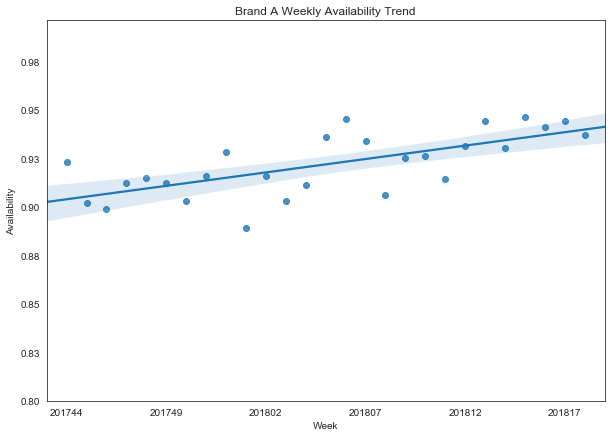

In [22]:
sns.set_style("white")
plt.subplots(figsize=(10,7))

ax = sns.regplot(
    data=weekly,
    x='week_index',
    y='Availability',
)

# Tighten up the axes for prettiness
ax.set_xlim(weekly['week_index'].min()-1, weekly['week_index'].max()+1)
ax.set_ylim(0.8, weekly['Availability'].max()+ 0.05)

ax.set_title('Brand A Weekly Availability Trend')
ax.set_xlabel('Week')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

new_labels = [weekly.loc[weekly['week_index'] == x, 'week_id'].values[0] if x in weekly['week_index'].tolist() else '' for x in ax.get_xticks()]
ax.set_xticklabels(new_labels);

In [20]:
lm2 = smf.ols('Availability~week_index', data=weekly).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Availability   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     21.83
Date:                Thu, 27 Dec 2018   Prob (F-statistic):           8.71e-05
Time:                        15:32:04   Log-Likelihood:                 82.219
No. Observations:                  27   AIC:                            -160.4
Df Residuals:                      25   BIC:                            -157.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9038      0.004    201.700      0.000       0.895       0.913
week_index     0.0014      0.000      4.672      0.000       0.001       0.002
==============================================================================
Omnibus:                        0.601   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.740   Jarque-Bera (JB):                0.430
Skew:                          -0.293   Prob(JB):                        0.807
Kurtosis:                       2.805   Cond. No.                         29.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""